In [3]:
from fenics import *
from mshr import *
import numpy as np
import matplotlib.pyplot as plt

We want to compute the deflection $D(x,y)$ of a two-dimensional, circular membrane of radius $R$, subject to a load $p$ over the membrane. The appropriate PDE model is

$$
-T\nabla^{2}D = p \quad \mathrm{in}\; \Omega = \{(x,y)\big\vert x^{2}+y^{2} \leq R\}
$$

Here, $T$ is the tension in the membrane (constant), and $p$ is the external pressure load. The boundary of the membrane has no deflection, implying $D = 0$ as a boundary condition. A localized load can be modeled as a Gaussian function:

$$
p(x,y) = \frac{A}{2\pi\sigma}\exp\bigg(-\frac{1}{2}\Big(\frac{x-x_{0}}{\sigma}\Big)^{2} - \frac{1}{2}\Big(\frac{y-y_{0}}{\sigma}\Big)^{2}\bigg)
$$

The parameter $A$ is the amplitude of the pressure, $(x_{0},y_{0})$ the localization of the maximum point of the load, and $\sigma$ the “width” of $p$. We will take the center $(x_0,y_0)$ of the pressure to be $(0,R_0)$ for some $0 < R_0 < R$.

$$
-\nabla^{2} w = 4\exp(-\beta^{2}(x^{2}+(y-R_{0})^{2})), \quad (x,y)\; \in \Omega
$$

Applying the identity: $\nabla \cdot(uv) = (\nabla u) v + u\cdot \nabla v$
$$
-\int_{\Omega} (\nabla^{2} w) v\,\mathrm{d}x = \int_{\Omega} \nabla w \cdot \nabla v \, \mathrm{d} x - \int_{\Omega} \nabla\cdot (\nabla w) v \,\mathrm{d}x=  \int_{\Omega} 4\exp(-\beta^{2}(x^{2}+(y-R_{0})^{2})) v\,\mathrm{d}x
$$
Divergence theorem:
$$
-\int_{\Omega} (\nabla^{2} w) v\,\mathrm{d}x = \int_{\Omega} \nabla w \cdot \nabla v \, \mathrm{d} x - \int_{\partial \Omega} \mathrm{n}\cdot (\nabla w) v \,\mathrm{d}s
$$
Weak form:
$$
\forall v \in \partial\Omega, v = 0 \longrightarrow \int_{\Omega} \nabla w \cdot \nabla v \,\mathrm{d}x = \int_{\Omega} 4\exp(-\beta^{2}(x^{2}+(y-R_{0})^{2})) v\,\mathrm{d}x   
$$
Variational:
$$
a(u,v) = L(v)
$$
$$
a(u,v) = \int_{\Omega} \nabla w \cdot \nabla v \,\mathrm{d}x
$$
$$
L(u,v) = \int_{\Omega} 4\exp(-\beta^{2}(x^{2}+(y-R_{0})^{2})) v\,\mathrm{d}x
$$

Calling FFC just-in-time (JIT) compiler, this may take some time.


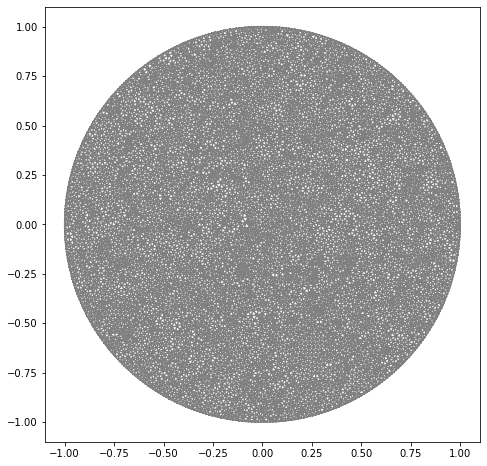

In [4]:
domain = Circle(Point(0,0),1)
mesh = generate_mesh(domain, 64)
V = FunctionSpace(mesh, 'P', 2)
plt.figure(figsize=(8,8))
plot(mesh)
plt.show()

In [5]:
# Define boundary condition
w_D = Constant(0) #w = 0 on boundaries

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, w_D, boundary)

# Define load
beta = 8
R0 = 0.6
p = Expression('4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))', degree=1, beta=beta, R0=R0)

Calling FFC just-in-time (JIT) compiler, this may take some time.


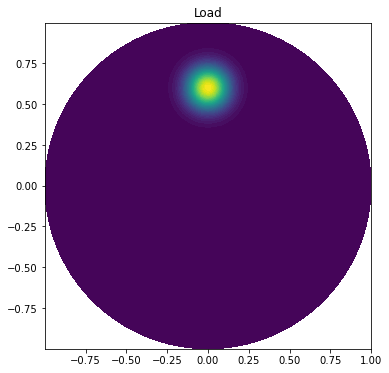

In [8]:
# Define variational problem
w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v))*dx
L = p*v*dx

# Solve
w = Function(V)
solve(a == L, w, bc)

# Plot solution
p = interpolate(p, V)
plt.figure(figsize=(6,6))
plot(w, title='Deflection')
plt.show()

plt.figure(figsize=(6,6))
plot(p, title='Load')
plt.show()

# Save solution to file
vtkfile_w = File('results/deflection.pvd')
vtkfile_w << w
vtkfile_p = File('results/load.pvd')
vtkfile_p << p

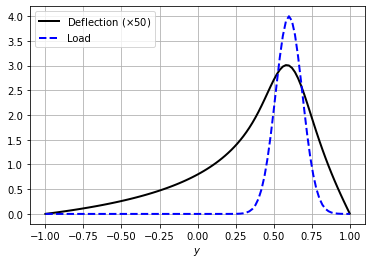

In [9]:
tol = 1e-3  # avoid hitting points outside the domain
y = np.linspace(-1 + tol, 1 - tol, 101)
points = [(0, y_) for y_ in y]  # 2D points
w_line = np.array([w(point) for point in points])
p_line = np.array([p(point) for point in points])
plt.plot(y, 50*w_line, 'k', linewidth=2)  # magnify w
plt.plot(y, p_line, 'b--', linewidth=2)
plt.grid(True)
plt.xlabel('$y$')
plt.legend(['Deflection ($\\times 50$)', 'Load'], loc='upper left')
plt.savefig('results/curves.pdf')
plt.savefig('results/curves.png')